# Решающие деревья

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<img src="https://i.ytimg.com/vi/TL6TfRX8FL0/maxresdefault.jpg">
<img src="https://camo.githubusercontent.com/3d2547f783a5312d269f91212973d5eca188bda4/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f323130302f312a327547745f61574a6f426a71463271547a5263324a512e6a706567">

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42)

## Обучение решающего дерева

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

## Визуализация

In [ ]:
plt.figure(figsize=(20, 15))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## Вывод текстовых правил

In [ ]:
print(export_text(clf, feature_names=iris['feature_names']))

## Визуализация на двухмерной плоскости

In [ ]:
plt.figure(figsize=(8, 8))
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

X = iris.data[:, [0, 1]]
y = iris.target

clf = DecisionTreeClassifier().fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

## Неустойчивость решающих деревьев

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indicies = np.random.randint(X.shape[0], size=int(X.shape[0] * 0.9))
    clf.fit(X[indicies], y[indicies])
    xx, yy = get_grid(X)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter', edgecolor='k')

## Подбор параметров

- **criterion** {“gini”, “entropy”}, default=”gini” <br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

- **splitter**: {“best”, “random”}, default=”best” <br>
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth**: default=0 <br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**: int or float, default=2 <br>
The minimum number of samples required to split an internal node:

- **min_samples_leaf**: int or float, default=1 <br>
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

- **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None <br>
The number of features to consider when looking for the best split:

- **max_leaf_nodes**: int, default=None <br>
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

- **min_impurity_decrease**: float, default=0.0 <br>
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- **min_impurity_split**: float, default=0 <br>
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [ ]:
plt.figure(figsize=(15, 15))

for idx, depth in enumerate([1, 2, 3, 4, 5, 6]):
    X = iris.data[:, [0, 1]]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)

    # Plot the decision boundary
    plt.subplot(3, 3, idx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.title('max_depth: ' + str(depth))

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

## Решающее дерево для регрессии

### Задача

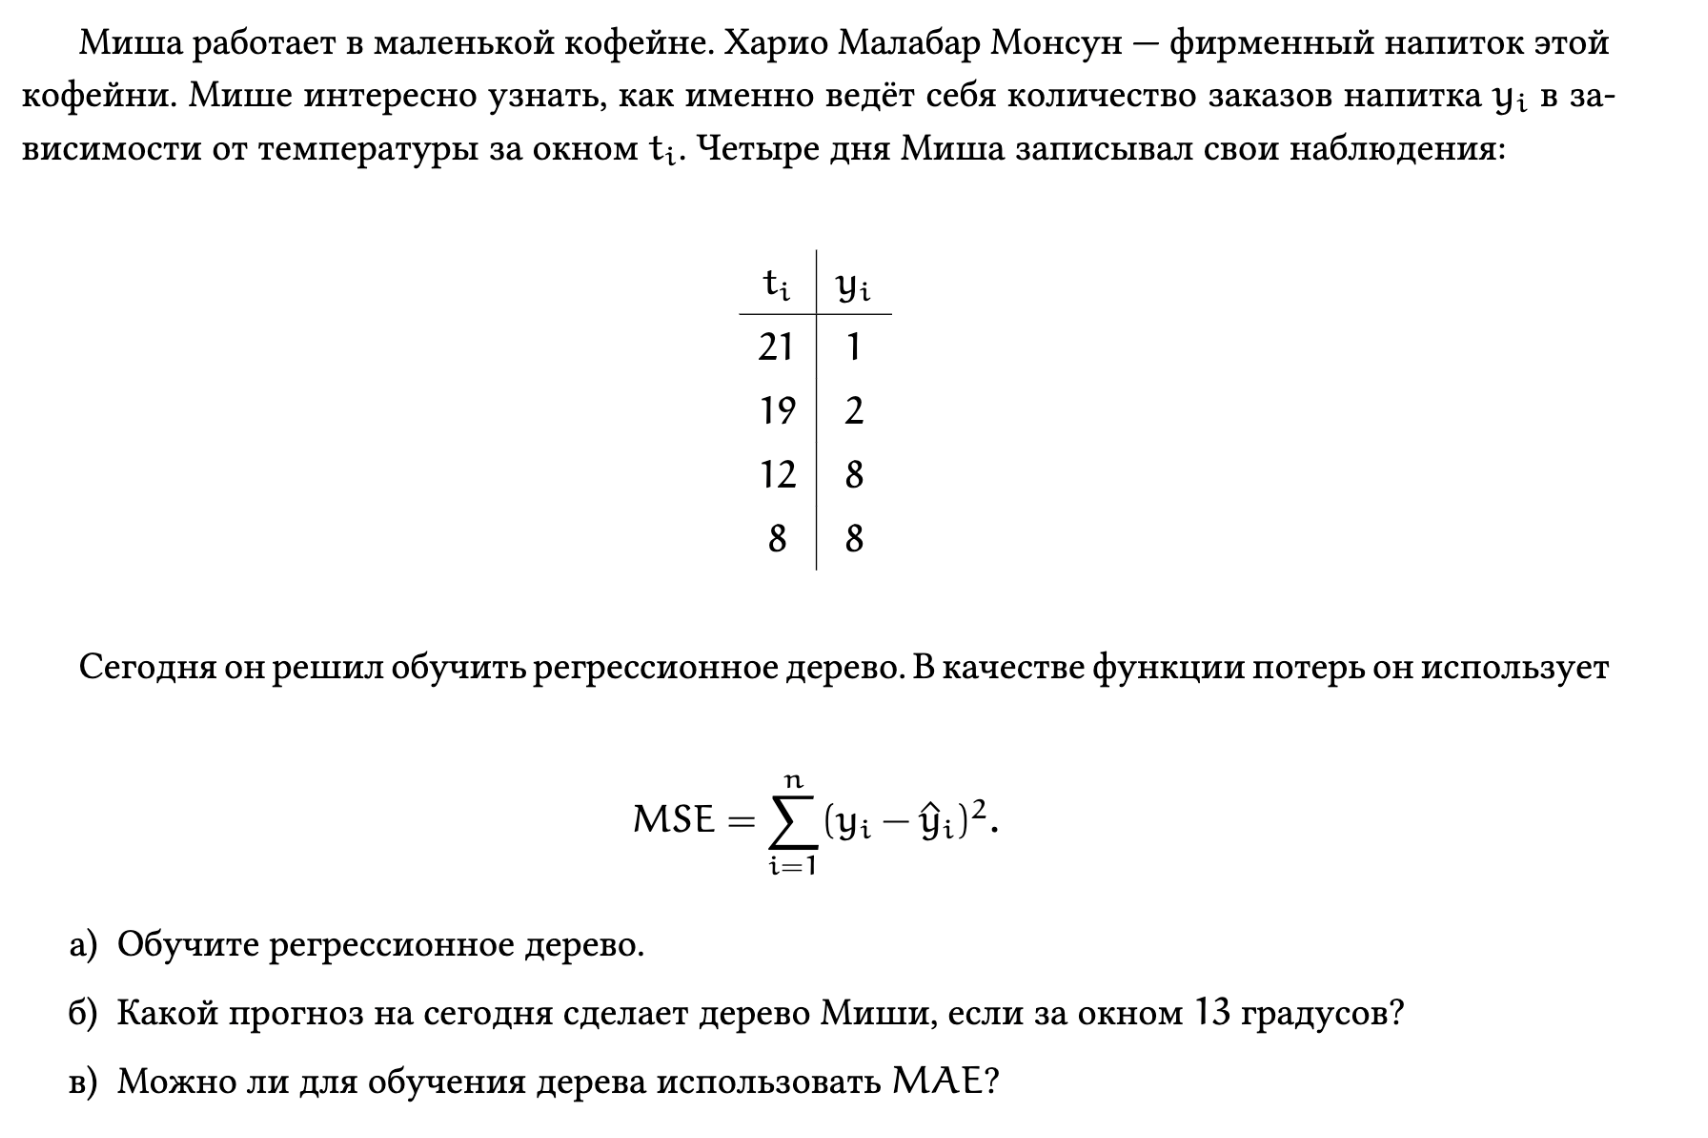

### Walmart

In [ ]:
from sklearn.preprocessing import StandardScaler  # класс для скалирования
from sklearn.linear_model import LinearRegression # подгрузили модель
from sklearn import metrics  # подгружаем метрики


In [ ]:
# функция, которая считает метрики и выводит их на экран
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    pass


def visualize_coefficients(model, feature_names, n_top_features=10):
    """
        Рисует картинку с важностью фичей 
            model - модель
            feature_names - названия переменных
            n_top_features - сколько самых важных переменных надо нарисовать
    """

    coef = model.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 1 + 2 * n_top_features), 
                feature_names[interesting_coefficients], rotation=75, ha="right");
    pass


def plot_yreal_ypred(y_test, y_train, X_test, X_train, model, margin=0.3):
    """
        Рисует картинку для прогнозов
            modelt - модель 
            y_train, X_train - обучающая выборка
            y_test, X_test - тестовая выборка
            margin - граница рисунка 
    """
    
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    plt.scatter(y_train, model.predict(X_train), color="red", alpha=0.1)
    plt.xlim(min(y_train) - margin, max(y_train) + margin)
    plt.ylim(min(y_train) - margin, max(y_train) + margin)
    plt.title('Train set', fontsize=20)
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel('Estimated quality', fontsize=14)

    plt.subplot(122)
    plt.scatter(y_test, model.predict(X_test), color="red", alpha=0.1)
    plt.xlim(min(y_test) - margin, max(y_test) + margin)
    plt.ylim(min(y_test) - margin, max(y_test) + margin)
    plt.title('Test set', fontsize=20)
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel('Estimated quality', fontsize=14)
    pass

In [ ]:
df = pd.read_csv('wmrt_preprcsd.csv')

In [ ]:
y = df['ln_future_sales']
X = df.drop(['ln_future_sales', 'Weekly_Sales'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)


scaler = StandardScaler()
scaler.fit(X_train[var_real]) 


X_train_scale = scaler.transform(X_train[var_real])
X_test_scale = scaler.transform(X_test[var_real])


X_train[var_real] = X_train_scale
X_test[var_real] = X_test_scale


#### Наивный прогноз 

In [ ]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им продажи
print_metrics(y_test, y_pred_naive)

#### Линейная регрессия

In [ ]:
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)

print_metrics(y_test, y_pred_regr)

In [ ]:
plot_yreal_ypred(y_test, y_train, X_test, X_train, model_regression)

### Регрессионное дерево

- Обучите регрессионное дерево
- Проверьте качество прогноза на тестовой выборке, сравните с константным и линейным прогнозом
- Проверьте переобученность модели (сравните значения метрик на тестовой и тренировочной выборке

Модель представлена в виде функции **DecisionTreeRegressor**

## Подбор параметров по решетке

In [ ]:
from sklearn.model_selection import GridSearchCV

Поиск по решетке - один из способов найти оптимальные значения гиперпараметров. Идея в том, чтобы пройтись по всем значениям и посмотреть, на каком из них достигается лучший результат.

Поиск лучшего значения гиперпараметра делается напрямую с кросс-валидацией

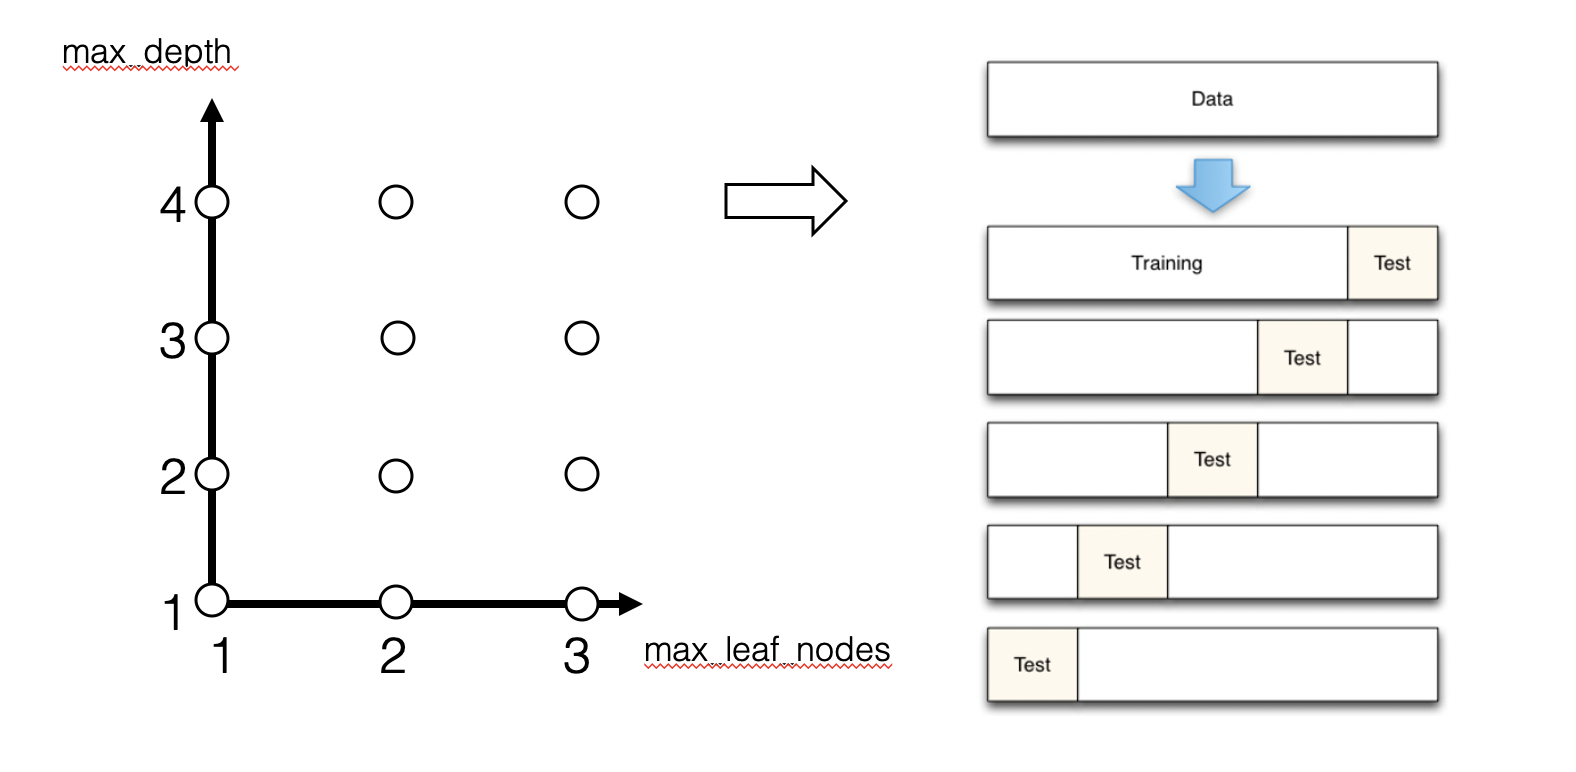

Основные параметры функции GridSearchCV:

- **estimator**
- **param_grid**
- **scoring**
- **cv**
- **return_train_score**

Основные методы:
- **fit**
- **predict**
- **predict_proba**
- **score**

In [ ]:
params = {'max_depth': [1, 2, 3, 4, 5, 6]}
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, params)
grid_tree.fit(iris.data, iris.target)

Основные поля grid_tree:
- **cv_results_dict_**
- **best_estimator_**
- **best_score_**
- **best_params_**
- **scorer_**
- **n_splits_**

### Задача

Вместе с партнерами по залу 
- выберите два гиперпараметра, которые будете оптимизировать
- определите список перебираемых значений
- организуйте поиск по решетке
- Для лучшей модели сравните значения метрик с константным и линейным прогнозом